# Yucatan Peninsula Hurricanes

### Data:

Boose, E. and D. Foster. 2023. Ecological Impacts of Hurricanes Across the Yucatan Peninsula 1851-2000 ver 23. Environmental Data Initiative. https://doi.org/10.6073/pasta/f219113373913f2daf421732e28d3c38 (Accessed 2024-10-24).

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-hfr.71.23&entityid=ab0fe2bf4f3ad850371ccb9c69d78469", parse_dates = ["start.date", "end.date"])

(df.loc[df['ss'] == 5]
    .assign(duration = pd.to_datetime(df['end.date'])- pd.to_datetime(df['start.date'])))[["name", "ss", "duration"]]

,name,ss,duration
76,Janet,5,0 days
96,Allen,5,1 days
98,Gilbert,5,1 days
103,Mitch,5,1 days


## Import data:

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-hfr.71.23&entityid=ab0fe2bf4f3ad850371ccb9c69d78469", parse_dates =["start.date", "end.date"])

In [20]:
df.tail()

,code,start.date,end.date,number,name,ss,track,rf.max
100,Y1995a,1995-10-01,1995-10-03,15,Opal,1,N*,F0
101,Y1995b,1995-10-10,1995-10-16,17,Roxanne,3,N,F2
102,Y1996,1996-08-20,1996-08-20,4,Dolly,1,N,F1
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1
104,Y2000,2000-10-01,2000-10-03,15,Keith,4,S,F2


In [5]:
df.dtypes

code                  object
start.date    datetime64[ns]
end.date      datetime64[ns]
number                 int64
name                  object
ss                     int64
track                 object
rf.max                object
dtype: object

In [6]:
df.columns = df.columns.str.replace(".", "_")

/tmp/ipykernel_1853065/3432526311.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(".", "_")


In [7]:
df.head()

,code,start_date,end_date,number,name,ss,track,rf_max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


In [9]:
df['duration'] = df['end_date']-df['start_date']

In [10]:
df.head()

,code,start_date,end_date,number,name,ss,track,rf_max,duration
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1,1 days
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1,0 days
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd,0 days
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1,0 days
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1,0 days


In [11]:
cat_5 = df[df['ss']==5].copy()

In [12]:
cat_5.head()

,code,start_date,end_date,number,name,ss,track,rf_max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


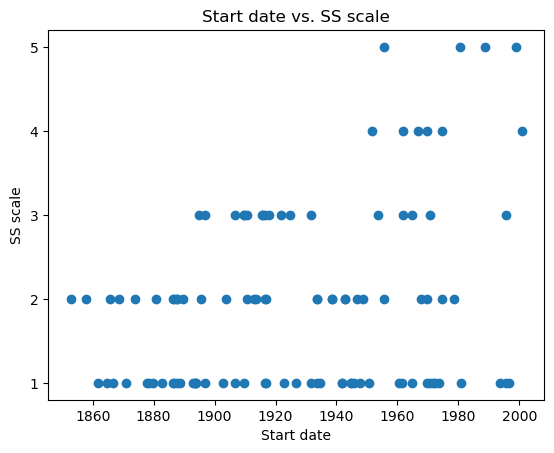

In [19]:
plt.figure()
plt.scatter(pd.to_datetime(df["start.date"]), df["ss"])
plt.title("Start date vs. SS scale (1851-2000)")
plt.xlabel('Start date')
plt.ylabel("SS scale")
plt.yticks([1,2,3,4,5])
plt.show()